This notebook will create some synthesised calls and check how well the ```measure_horseshoe_bat_calls``` package can replicate the original parameters. 

-- Thejasvi Beleyur 2020-03-26

In [1]:
import sys 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


In [2]:
import measure_horseshoe_bat_calls
from measure_horseshoe_bat_calls import measure_a_horseshoe_bat_call as measure
from measure_horseshoe_bat_calls import segment_horseshoebat_call as segment
from measure_horseshoe_bat_calls.view_horseshoebat_call import *
from measure_horseshoe_bat_calls import data

In [3]:
%matplotlib notebook

In [4]:
cf_duration = np.arange(0.002, 0.08,0.04)
fm_duration = np.arange(0.001, 0.006, 0.001)
peak_frequency = np.arange(90000, 120000, 10000)
fm_bandw = np.arange(15000, 25000, 1000)

In [5]:
all_parameter_combinations = np.array(np.meshgrid(cf_duration, fm_duration, peak_frequency, fm_bandw)).T.reshape(-1,4)
synthetic_calls = pd.DataFrame(all_parameter_combinations)
synthetic_calls.columns = ['cf_duration','fm_duration','peak_frequency','fm_bandw']
synthetic_calls['call_durn'] = synthetic_calls['cf_duration'] + synthetic_calls['fm_duration']
synthetic_calls['sweep_rate_kHz_per_ms'] = (synthetic_calls['fm_bandw']*10**-3)/(synthetic_calls['fm_duration']*10**3)
synthetic_calls.head()


,cf_duration,fm_duration,peak_frequency,fm_bandw,call_durn,sweep_rate_kHz_per_ms
0,0.002,0.001,90000.0,15000.0,0.003,15.00
1,0.002,0.002,90000.0,15000.0,0.004,7.50
2,0.002,0.003,90000.0,15000.0,0.005,5.00
3,0.002,0.004,90000.0,15000.0,0.006,3.75
4,0.002,0.005,90000.0,15000.0,0.007,3.00


In [6]:
synthetic_calls.tail()

,cf_duration,fm_duration,peak_frequency,fm_bandw,call_durn,sweep_rate_kHz_per_ms
295,0.042,0.001,110000.0,24000.0,0.043,24.0
296,0.042,0.002,110000.0,24000.0,0.044,12.0
297,0.042,0.003,110000.0,24000.0,0.045,8.0
298,0.042,0.004,110000.0,24000.0,0.046,6.0
299,0.042,0.005,110000.0,24000.0,0.047,4.8


In [7]:
multiparameter_calls = {}

In [8]:
synthetic_calls.iloc[:,:5]

,cf_duration,fm_duration,peak_frequency,fm_bandw,call_durn
0,0.002,0.001,90000.0,15000.0,0.003
1,0.002,0.002,90000.0,15000.0,0.004
2,0.002,0.003,90000.0,15000.0,0.005
3,0.002,0.004,90000.0,15000.0,0.006
4,0.002,0.005,90000.0,15000.0,0.007
...,...,...,...,...,...
295,0.042,0.001,110000.0,24000.0,0.043
296,0.042,0.002,110000.0,24000.0,0.044
297,0.042,0.003,110000.0,24000.0,0.045
298,0.042,0.004,110000.0,24000.0,0.046


In [9]:
fs = 500000
for i, call_parameter in synthetic_calls.iloc[:,:5].iterrows():
    cf_durn, fm_durn, peak_f, fm_bw, _= call_parameter
    only_call =  measure.make_one_CFcall(cf_durn+fm_durn, fm_durn, cf_freq=peak_f, fs=fs,
                                                           call_shape='staplepin',
                                                           fm_bandwidth=fm_bw)
    gap = 250
    call_w_noise = np.random.normal(0,10**-60/20,only_call.size+gap*2)
    call_w_noise[gap:-gap] += only_call
    multiparameter_calls[tuple(call_parameter.tolist())] = call_w_noise
    

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipy

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipy

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipy

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipy

C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
C:\Users\tbeleyur\Anaconda2\envs\lim_int\lib\site-packages\ipy

In [10]:
multiparameter_calls.keys()

dict_keys([(0.002, 0.001, 90000.0, 15000.0, 0.003), (0.002, 0.002, 90000.0, 15000.0, 0.004), (0.002, 0.003, 90000.0, 15000.0, 0.005), (0.002, 0.004, 90000.0, 15000.0, 0.006), (0.002, 0.005, 90000.0, 15000.0, 0.007), (0.042, 0.001, 90000.0, 15000.0, 0.043000000000000003), (0.042, 0.002, 90000.0, 15000.0, 0.044000000000000004), (0.042, 0.003, 90000.0, 15000.0, 0.045000000000000005), (0.042, 0.004, 90000.0, 15000.0, 0.046), (0.042, 0.005, 90000.0, 15000.0, 0.047), (0.002, 0.001, 100000.0, 15000.0, 0.003), (0.002, 0.002, 100000.0, 15000.0, 0.004), (0.002, 0.003, 100000.0, 15000.0, 0.005), (0.002, 0.004, 100000.0, 15000.0, 0.006), (0.002, 0.005, 100000.0, 15000.0, 0.007), (0.042, 0.001, 100000.0, 15000.0, 0.043000000000000003), (0.042, 0.002, 100000.0, 15000.0, 0.044000000000000004), (0.042, 0.003, 100000.0, 15000.0, 0.045000000000000005), (0.042, 0.004, 100000.0, 15000.0, 0.046), (0.042, 0.005, 100000.0, 15000.0, 0.047), (0.002, 0.001, 110000.0, 15000.0, 0.003), (0.002, 0.002, 110000.0, 15

In [12]:
list(multiparameter_calls.keys())[10]

(0.002, 0.001, 100000.0, 15000.0, 0.003)

In [46]:
index = 10
params = list(multiparameter_calls.keys())[index]
print(params)
call = multiparameter_calls[params]
main_call_window, _ = segment.segment_call_from_background(call, fs, lowest_relevant_frequency=40000,
                                                 background_threshold=-2)
main_call = call[main_call_window]
cf_segment, fm_segment, _ = segment.segment_call_into_cf_fm(main_call,fs)
sounds, msmts = measure.measure_hbc_call(main_call,fs, cf_segment, fm_segment)

(0.002, 0.001, 100000.0, 15000.0, 0.003)


<IPython.core.display.Javascript object>


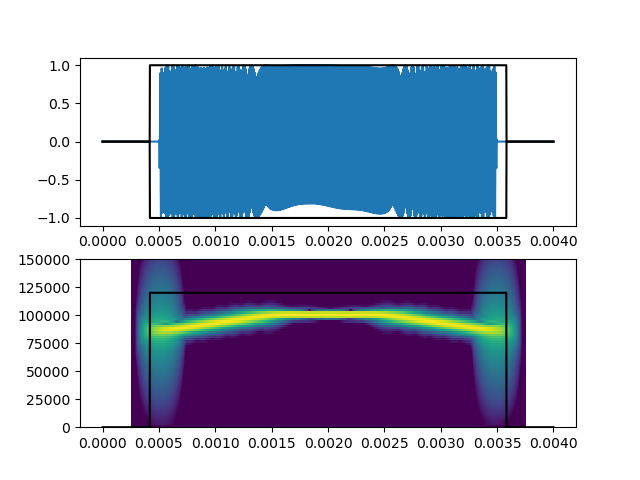

(0, 150000)

In [47]:
wavef, specg = check_call_background_segmentation(call, fs, main_call_window,fft_size=int(fs*0.0005))
specg.set_ylim(0,150000)

<IPython.core.display.Javascript object>


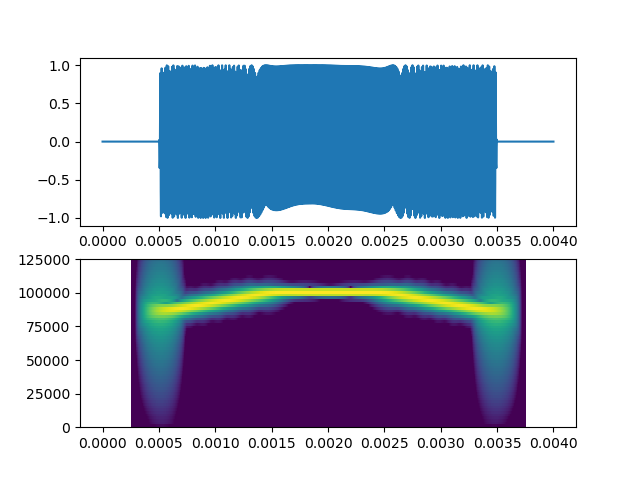

(0, 125000)

In [48]:
waveform, spec = visualise_call(call, fs, fft_size=int(fs*0.0005))
spec.set_ylim(0,125000)

<IPython.core.display.Javascript object>


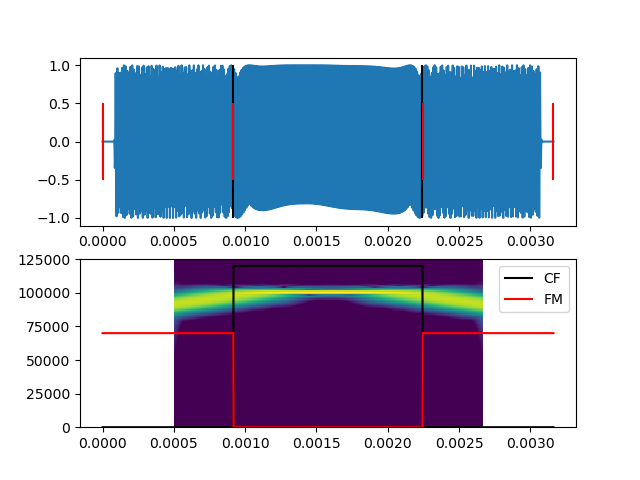

(0, 125000)

In [49]:
wave, spec = check_call_parts_segmentation(main_call, fs, cf_segment, fm_segment)
spec.set_ylim(0,125000)

<IPython.core.display.Javascript object>


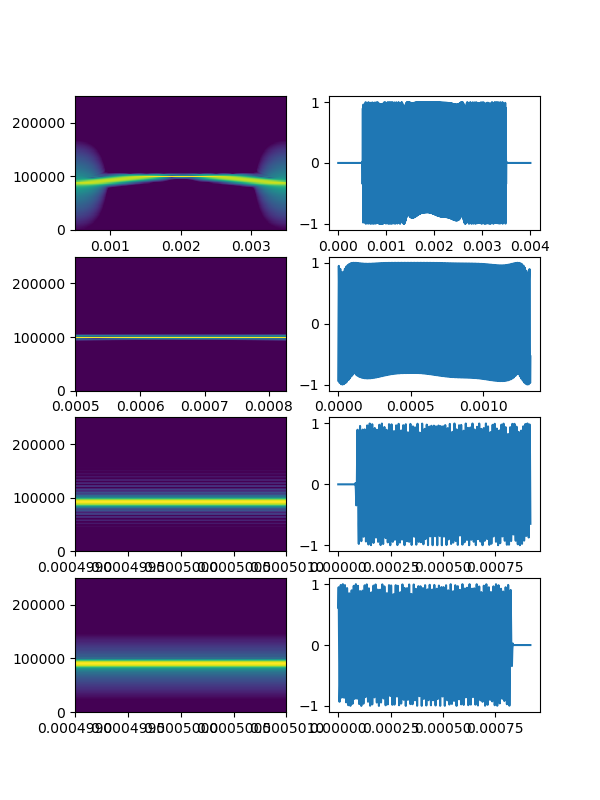

c:\users\tbeleyur\google drive\holger goerlitz- imprs\phd_2015\projects and analyses\packages\measure_horseshoe_bat_calls\measure_horseshoe_bat_calls\view_horseshoebat_call.py:146: UserWarning: Only one segment is calculated since parameter NFFT (=500) >= signal length (=459).
  cmap=cmap)
c:\users\tbeleyur\google drive\holger goerlitz- imprs\phd_2015\projects and analyses\packages\measure_horseshoe_bat_calls\measure_horseshoe_bat_calls\view_horseshoebat_call.py:146: UserWarning: Only one segment is calculated since parameter NFFT (=500) >= signal length (=459).
  cmap=cmap)


In [50]:
show_all_call_parts(call, sounds, fs)

In [51]:
output = pd.DataFrame(data=msmts, index=[0])
output

,call_duration,call_energy,call_rms,peak_frequency,peak_frequency_resolution,cf_start,cf_end,cf_duration,cf_energy,cf_rms,...,upfm_start,upfm_end,downfm_duration,downfm_energy,downfm_rms,downfm_terminal_frequency,downfm_terminalfreq_resolution,downfm_start,downfm_end,terminal_frequency_threshold
0,0.003162,744.811219,0.686368,100253.004428,316.055626,0.000918,0.002242,0.001326,331.60269,0.707216,...,0.0,0.000916,0.000918,206.432079,0.670629,83877.995643,1089.324619,0.002244,0.00316,-10


In [52]:
output['peak_frequency']-output['upfm_terminal_frequency']

0    16375.008785
dtype: float64

In [53]:
output['upfm_terminal_frequency']-output['downfm_terminal_frequency']

0    0.0
dtype: float64

In [54]:
output['upfm_terminalfreq_resolution'],output['downfm_terminalfreq_resolution']

(0    1089.324619
 Name: upfm_terminalfreq_resolution, dtype: float64,
 0    1089.324619
 Name: downfm_terminalfreq_resolution, dtype: float64)

In [57]:
output['cf_duration']

0    0.001326
Name: cf_duration, dtype: float64

In [56]:
output['upfm_duration']

0    0.000918
Name: upfm_duration, dtype: float64

In [55]:
params

(0.002, 0.001, 100000.0, 15000.0, 0.003)

### Comment:
At least right now I can see that the CF part of the call is being picked up relatively accurately (peak CF and duration) -- but the FM durations are not being picked up well at all. They are constantly being under-estimated. I guess this is where the peak-CF amplification and energy profile calculations may be more useful. 